# Аналитическая справка по компании 'kiva' на основании материалов предоставленных заказчиком 

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
a=pd.read_csv('loan_themes_by_region.csv')
b=pd.read_csv('kiva_loans.csv', parse_dates=['posted_time','disbursed_time','funded_time','date'])
c=pd.read_csv('kiva_mpi_region_locations.csv')

мне не понравился аналитический отчет, который был представлен на мастрер классе. 
Мои аргументы следующие:
1. При анализе по странам автор ошибочно делает вывод о том, что большое количество одобренных заявок в Филлипинах скорее обусловлено краткосрочностью займов. 
В данном случае, на мой взгляд основная причина кроется в другом:
На Филиппинах наибольшее количество партнеров организации:
ниже представлены названия организаций и количество представительств по стране.



#### Field Partner Name
* Alalay sa Kaunlaran (ASKI)                     1207
* Gata Daku Multi-purpose Cooperative (GDMPC)     952
* Paglaum Multi-Purpose Cooperative (PMPC)        673
* Negros Women for Tomorrow Foundation (NWTF)     300
* Community Economic Ventures, Inc. (CEVI)        213
* CCT Credit Cooperative                           68
* SEED Center Philippines                          43
* BagoSphere                                       10

Причем здесь стоит выделить абсолютного рекордсмена,не по количеству отделений, а по количеству выданных займов:
##### Negros Women for Tomorrow Foundation (NWTF) 300 отделений в стране   https://nwtf.org.ph/   
Кстати то что эта организация в основном занимается помощью женщинам, обьясняет большую долю выдачи займов женщинам на Филиппинах чем в среднем по миру (151984-женщин  и 8377-мужчин. Доля женщин  -95%) в целом по миру (426502 женщин против 134710	мужчин. Доля женщин -76%)
* Эта организация входит в состав "Wholeplanetfoundation" - организации, занимающейся подобным финансированием по всему миру
на втором месте по количеству выданных кредитов находится:
* CrediCampo 125 отделений в Сальвадоре http://www.credicampo.com.sv/ и не удивительноЮ что Сальвадор находится на третьем месте, по количеству выданных кредитов
на третьем месте находится
* Interactuar из Колумбии, имеющая 671 отделение https://interactuar.org.co/
и не удивительно, что Колумбия находится в десятке первых стран по выдаче кредитов (7 место)
* iDE Cambodia стоит обратить внимание еще на одну успешную организацию. Она имеет всего три отделения в Камболже, но выдано кредитов 15837! https://www.ideglobal.org/ 
* Juhudi Kilimo Еще одна организация входящая в пятеркк лидеров по количеству выданных кредитов https://juhudikilimo.com/. Эта организация не только выдает кредиты, но и оказывает услуги по обучению бизнесу, новым технологиям земледелия и т.д. 
Прослеживается однозначная корреляция с количеством выданных займов и работой конкретных организаций.   
Следовательно для дальнейшего более детального анализа требуется изучить работу наиболее активных партнеров и распространить их опыт на другие страны. 
В случае продолжения работы по анализу деятеятельности KIVA  считаю важным провести кроме этого более детальный работы партнерств  в этом разрезе.  
Для большей наглядности работы партнерств, на карту мира выложены  их координаты . Разными цветами обозначены точки с разным уровнем бедности по регионам  (показатель "MPI") (для показа карты модуль **folium** требует подключенного интернета)
Даже поверхностный анализ карты увидеть  неравномерность распределения партнерств по миру. Так, например, практически полное их отсутствие в Индии, несмотря на высокую плотность населения и крайнюю его бедность.



### Для сравнения возьмем список из 20 стран с наибольшим количеством партнерств:
* Philippines    3467
* Armenia        1064
* Colombia        824
* Mexico          716
* Vietnam         687
* Peru            609
* Kenya           593
* Cambodia        567
* El Salvador     496
* Tajikistan      454
* Lebanon         416
* Kyrgyzstan      412
* Samoa           398
* Lesotho         336
* Uganda          304
* India           296
* Georgia         296
* Palestine       285
* Mali            235
* Pakistan        227  
Прослеживается четкая взаимосвязь количества выданных займов (список показанный на мастер классе)
с количеством партнерств организации KIVA в этих странах'

In [3]:
# Выведем на карту все партнерские отделения и для наглядности раскрасим их разным цветом в зависимости от уровня 'MPI'
# Ярко красные участки  обозначают регионы с наименьшим 'MPI'

def col_exp(x):
    list_colors=['#990000','#ff0000','#ff5050','#ff0066','#ff3399','#ff33cc','#ff00ff','#cc00ff','#9900ff']
    return list_colors[int(x*10)]
    
    
cs=c[['lat','lon','MPI']].dropna()
geo_list=list(zip(cs['lat'].tolist(), cs['lon'].tolist(), cs['MPI'].tolist()))
import folium
map=folium.Map()
for x in geo_list:
    
      folium.CircleMarker([x[0],x[1]],radius=1,color=col_exp(x[2])).add_to(map)
map

Не согласен так же с автором о необходимости более широкого освещения деятельности данной организации в интернете. Да именно интернет необходим для заполнения заявки и ее продвижения, но  анализ доступности интернета, а также учет небольшого размера запрашиваемых сумм, говорит о низком финансовом уровне заемщиков и, скорее всего, у большей части из них доступа к интернету нет. Поэтому велико значение offline работы. Косвенно это подтверждается тем, что наиболее эффективно сбор заявок осуществляется именно партнерами, имеющими непосредственно подразделения в соответствующих странах. На карте предсталены данные по доступности интерента среди населения. 
![](wifi.jpg)

### Задание 1
* Зависимость пола заемщика от региона планеты, сектора экономики.

In [6]:
list_world_region={}
for v in pd.unique(c.world_region):
    if v==v:
         list_world_region[v]=pd.unique(c[c['world_region']==v]['country'])
list_world_region
def world_region(k):# Создаем функцию, которая относит страну  к соответствующему региону мира.
    for j in list_world_region:
        if np.sum(list_world_region[j]==k)==1:
            return(j)
b['world_region']=b['country'].apply(world_region)
b

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,world_region
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,South Asia
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,South Asia
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,South Asia
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,South Asia
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,South Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,...,2017-07-25 16:55:34+00:00,2017-07-25 07:00:00+00:00,NaT,13.0,0,NaN,female,monthly,2017-07-25,None
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,2017-07-25 06:14:08+00:00,2017-07-24 07:00:00+00:00,2017-07-26 02:09:43+00:00,13.0,1,NaN,female,monthly,2017-07-25,Sub-Saharan Africa
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,...,2017-07-26 00:02:07+00:00,2017-07-25 07:00:00+00:00,NaT,13.0,0,NaN,NaN,monthly,2017-07-26,Sub-Saharan Africa
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,2017-07-26 06:12:55+00:00,2017-07-25 07:00:00+00:00,NaT,13.0,0,NaN,female,monthly,2017-07-26,Sub-Saharan Africa


,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210
...,...,...,...,...,...,...,...,...,...
1003,"Mashonaland West, Zimbabwe",ZWE,Zimbabwe,Mashonaland West,Sub-Saharan Africa,0.192,"(-17.4851029, 29.7889248)",-17.485103,29.788925
1004,"Masvingo, Zimbabwe",ZWE,Zimbabwe,Masvingo,Sub-Saharan Africa,0.174,"(-20.0791909, 30.8384093)",-20.079191,30.838409
1005,"Matabeleland North, Zimbabwe",ZWE,Zimbabwe,Matabeleland North,Sub-Saharan Africa,0.238,"(-18.5331566, 27.5495846)",-18.533157,27.549585
1006,"Matabeleland South, Zimbabwe",ZWE,Zimbabwe,Matabeleland South,Sub-Saharan Africa,0.164,"(-21.052337, 29.0459927)",-21.052337,29.045993


### проверяем корректность выполнения процедуры распределения стран по регионам. И видим  пренеприятнейшую вещь.
Оказывается некоторые страны не отнесены ни к одному региону. К чему бы это?
А не проверить ли уникальные названия стран в  датафрейме файла " kiva_mpi_region_locations.csv". И что мы видим??? Эти редиски по разному назвали 25  стран в разных файлах.  Список этих стран предоставлен ниже.  
 Они или даны  с ошибкой как **'Vietnam'** и **'Viet nam'** или даны разные названия **'Moldova'** и **'Moldova, Republic of'** или некоторые страны вообще отсутствуют в списке MPI: **'Solomon Islands', 'Turkey','Israel', 'Panama'** и т.д.
Таким образом пока возможно сделать необходимую сводку только по тем странам, где удалось сопоставить страну и страну света.  В принципе можно в ручную сопоставить и оставшиеся страны, а по другим странам найти соответствующую сторону света... Учитывая то, что данный анализ носит разведочный характер, опустим несоответствующие страны,  но при полном анализе их придется учитывать. А в данном исследовании они не учтены, при изучении влияния страны света на пол заемщиков 

In [7]:
countr_list_mpi=set(pd.unique(c['country']))
countr_list_loan=set(pd.unique(b['country']))

print("\033[35m Список стран, присутствующих в файле  заемщиков Но отсутcтвующих в файле MPI:\033[0m \n\n ",list((countr_list_loan-countr_list_mpi)))

print("\n\n \033[35mСписок стран, присутствующих в файле  MPI Но отсутcтвующих в файле заемщиков:\033[0m\n ",'',list((countr_list_mpi-countr_list_loan)))


 Список стран, присутствующих в файле  заемщиков Но отсутcтвующих в файле MPI: 

  ['Panama', 'Costa Rica', 'Israel', 'Virgin Islands', 'Moldova', 'Saint Vincent and the Grenadines', 'The Democratic Republic of the Congo', 'Vietnam', 'Solomon Islands', "Cote D'Ivoire", 'Turkey', 'Puerto Rico', 'Samoa', 'Tanzania', 'Palestine', 'Congo', 'Kosovo', 'Myanmar (Burma)', 'Georgia', 'Bolivia', 'United States', 'Chile', 'Lebanon', 'Paraguay', 'Guam']


 Список стран, присутствующих в файле  MPI Но отсутcтвующих в файле заемщиков:
   [nan, 'Viet Nam', 'Moldova, Republic of', 'Guinea', 'Trinidad and Tobago', 'Comoros', 'Gabon', 'Turkmenistan', 'Myanmar', 'Jamaica', 'Chad', 'Algeria', 'Central African Republic', 'Gambia', 'Saint Lucia', 'Congo, Democratic Republic of the', 'Niger', 'Kazakhstan', 'Syrian Arab Republic', 'Bolivia, Plurinational State of', 'Djibouti', 'Morocco', 'Palestine, State ofa', 'Guinea-Bissau', 'Montenegro', 'Bosnia and Herzegovina', 'Ethiopia', "Cote d'Ivoire", 'Bangladesh',

###  Гендерное соотношение  замщиков по регионам мира (World regions) 
Для удобства восприятия и относительных и абсолютных величин построены для каждого региона два вида диаграмм.
Круговые диаграммы позволяют лучше отследить долевое соотношени, а гистограммы позволяют увидеть в том числе в сравнении с количсетвом выданных займов по регионам
Как было показано на мастер-классе, в базе более 11 тысяч видов пола. Можно конечно распарсить сложные комбинции большого количества созаемщиков и в долях учесть их, но мне кажется для разведочного анализа вполне достаточно просто выбрать одиночных заемщиков  и исследовать только их. Хотя, наверное, в качестве отдельного исследования можно было бы рассмотреть отдельно группы заемщиков. Возможно там можно было бы увидеть какие-то другие тенденции. 
Все закономерности представлены на графике.
Видно, что в  большинстве регионов основными заемщиками являются женщины. В некоторых регионах регионах сооотношение близко к 50:50, но учитывая мизерный обьем финансирования это не вносит существенный вклад в общую статистику. Не стоит искать слишком глубоких причин такого разделения, так как большинство некоммерческих организаций,  являющихся партнерами KIVA Это организации предпочитающие помогать женщинам(так указано на их сайтах). К тому же на самом сайте KIVA есть отдельный раздел "Помощь женщинам"

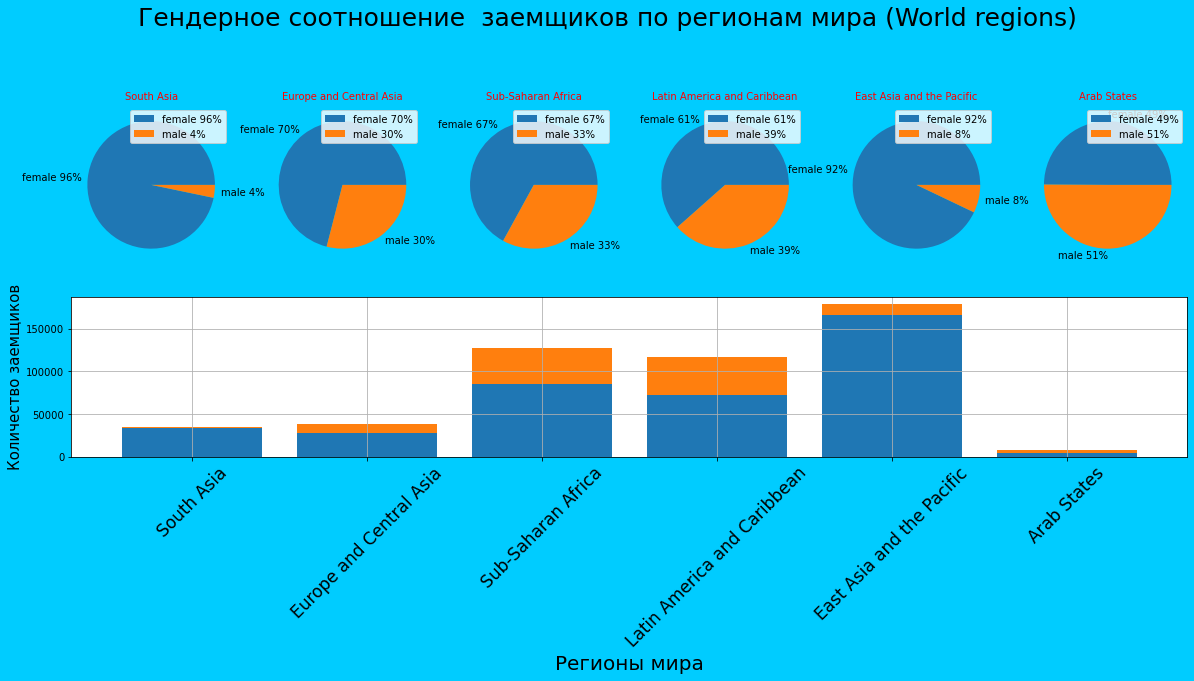

In [8]:
gend_world_reg={}
for i in list_world_region:
    gen=[sum(b[b['world_region']==i]['borrower_genders']=='female'),sum(b[b['world_region']==i]['borrower_genders']=='male')]
    gen.append(int(gen[0]/(gen[0]+gen[1])*100))
    gend_world_reg[i]=gen


fig,ax=plt.subplots(1,6, figsize=(20,10),facecolor='#00ccff')
m=-1
for i in gend_world_reg:
    m+=1
    
    ax[m].set_title(i,fontsize=10,color='r')
    female='female '+str(gend_world_reg[i][2])+'%'
    male='male '+str(100-gend_world_reg[i][2])+'%'
    ax[m].set_facecolor('#ffff66')
    ax[m].pie(gend_world_reg[i][:2], labels=[female,male])
    ax[m].legend()

axz=fig.add_subplot(3,1,3)
axz.bar(np.arange(0,6), list(gend_world_reg[i][0] for i in gend_world_reg),
        tick_label=list(gend_world_reg[i][0] for i in gend_world_reg))
axz.bar(np.arange(0,6), list(gend_world_reg[i][1] for i in gend_world_reg),
        bottom=list(gend_world_reg[i][0] for i in gend_world_reg))
axz.set_xticks(np.arange(0,6))
axz.set_ylabel('Количество заемщиков',fontsize=15)
axz.set_xlabel('Регионы мира',fontsize=20)
axz.set_xticklabels(list(gend_world_reg),
                  rotation=45,
                  fontsize=17)
fig.suptitle('Гендерное соотношение  заемщиков по регионам мира (World regions) ', y=0.75,fontsize=25)
axz.grid()
plt.show()

### Теперь посмотрим  гендерное соотношение по отраслям экономики 
Учитывая то, что доли по отраслям без учета пола были уже рассмотренына мастер классе, чтобы не загружать отчет приведены только диаграммы соотношения пола к отраслям

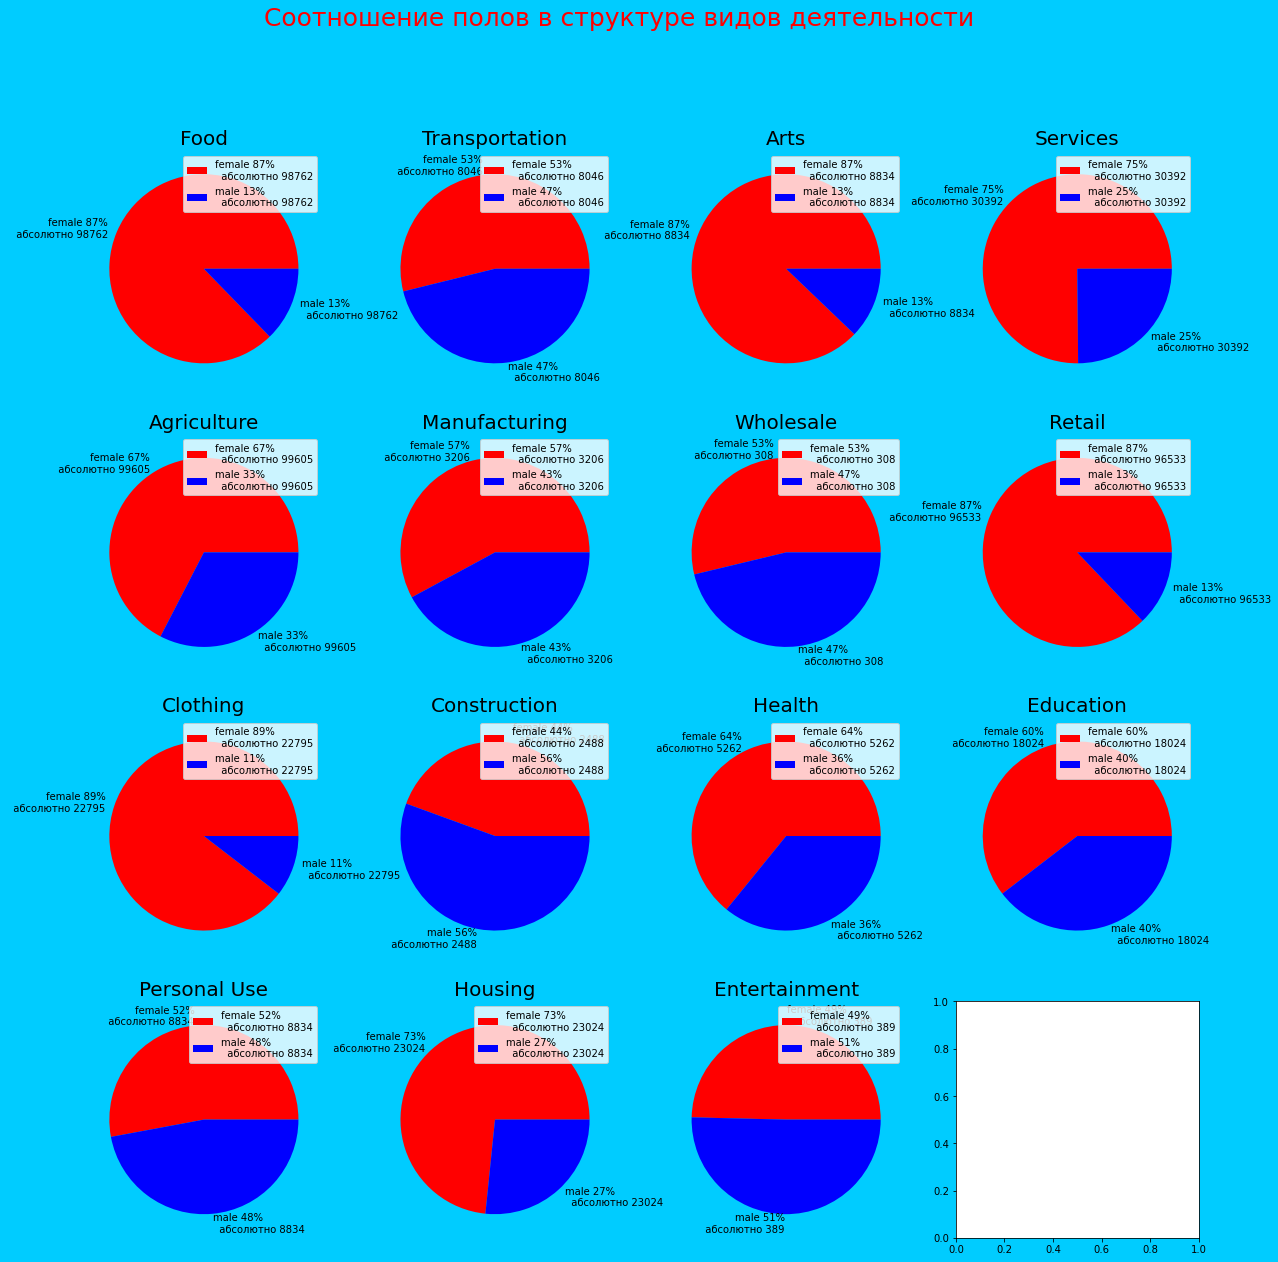

In [44]:
sector_list=pd.unique(b['sector'])
gen_sec={}
for i in sector_list:
    gen=[sum(b[b['sector']==i]['borrower_genders']=='female'),sum(b[b['sector']==i]['borrower_genders']=='male')]
    gen.append(int(gen[0]/(gen[0]+gen[1])*100))
    gen_sec[i]=gen
fig,ax=plt.subplots(4,4, figsize=(20,20),facecolor='#00ccff')
m=-1
for i in sector_list:
    m+=1
    x=m//4
    y=m%4
    ax[x,y].set_title(i,fontsize=20)
    female='female '+str(gen_sec[i][2])+'%\n  абсолютно '+str(gen_sec[i][0])
    male='male '+str(100-gen_sec[i][2])+'%\n  абсолютно '+str(gen_sec[i][0])
    ax[x,y].set_facecolor('#ffff66')
    ax[x,y].pie(gen_sec[i][:2], labels=[female,male],colors=['red','blue'])
    ax[x,y].legend()
fig.suptitle('Соотношение полов в структуре видов деятельности ', fontsize=25, color='r')
plt.show()


#### Второй пункт домашнего задания
* Влияние такого атрибута займа как Количество кредиторов (lender_count) на суммы и сроки займов.
На мой взгляд вопрос поставлен вообще некорректно. Количество кредиторов никак не влияет на суммы и сроки кредитов. Но есть обратная зависимомть. То есть сумма и сроки займа влияют на количество кредиторов. Потому, что последовательность этапов финансирования каждой заявки следущая:
* Вначале формируется заявка
* заявка одобряется и размещается на платформе
* после этого участники платформы самостятельно выбирают кого финансировать. При попадании на сайт потенциальный инвестор  не выбирает компанию инвесторов- он выбирает заявку, которую он готов профинансировать. На сайте есть возможность коллективным инвесторам принимать участие в финансировании заявок. Однако в исследуемом датасете не указано сколько частных инвесторовБ а сколько коллективных принимают участие в финансировании заявки. Более того форма работы сайта позволяет сделать пожертвование только в размере **25** \\$ США. Поэтому и изучение обратной зависимости: количества инвесторов от суммы заявки  и сроков выглядит сомнительным. Скорее всего результаты будут следующими: Зависимость между суммой заявки и количеством инвестором будет прямой пропорциональность. Срок заявки не может повлиять на количество инвесторов. Количество инвестров практически можно посчитать просто разделив сумму займа на стоимость одного взноса. На сайте сейчас в поле суммы пожертвования есть выпадающий список с единственным значение. Скорее всего раньше была возможность выбора размера взноса.
Сделаем простое вычисление:  
Найдем среднее количество инвесторов - это приблизительно **20** человек  
теперь умножим это количество на стандартную сумму взноса **25**\\$.  В итоге получаем сумму, которая неплохо согласуется со средней суммой займа  **842**\\$, учитывая то, что большая часть сумм находится в диапазоне от **400** до **1000**\\$. А отклонение   скорее всего говорит о том, что  раньше имелась возможность выбирать сумму инвестиции? Иначе суммы совпали бы совсем.
Ксати меня очень удивило, оказывется через эту платформу люди пытаются собрать в том числе и достаточно большие суммы.
Так самая большая заявка была создана  **2014-06-10 (id № 722883)** на сумму **100000**\\$  и уже в течение  трех месяцев благодаря помощи **2986** инвесторов (взнос каждого в средем **30**\\$) сумма была собрана. Сектор этой заявки сельское хозяйство  предполагает создание 300 рабочих мест.   
Больше **50 000**\\$ **40** заявок.  
Удивляет наличие **8824** заявок на сумму меньше **100**\\$
 


#### Третий пункт задания. 
* Влияние показателя MPI (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.
Что нам дано? Файл со значением индекса MPI по регионам. Что требуется? Посмотреть связь между индексом MPI и средней суммой займа и сроком погашения.
* Первый момент несоответствия названия стран в разных файлах разъяснен выше. Поэтому автоматически  сопоставить страны получателей кредитов и страны индекс MPI, которых указан не всегда получилось удачно.
* Второй момент, с которым приходится столкнуться- в файле по индексу MPI прописаны регионы, поэтому выведем средние значения по стране, хотя это может и не совсем корректно, потому, что среднее арифметическое  значение индекса по регионам не обязательно является средним по стране (учитывая разную населенность регионов). 
Поэтому анализ проведем  с учетом  следующих условных допущений:  
- Анализ будет производиться только по тем странам, где названия совпали в обоих файлах. При желании можно, конечно вручную произвести сопоставление  названий стран, но в данном случае мы всего лишь пытаемся отследить тенденции.
- Значения индекса MPI мы будем использовать  как средние арифметические индекса по регионам страны, что естественно вносит долю своей погрешности.
Для большей достоверности стоит отсечь страны с небольшим количеством выданных кредитов.
Я установил границу не менее 1000
На плоскости расположим точки, соответствующие стране. Так чтобы координатой по оси Х было значение индекса MPI,  а по оси Y средней суммы займа. 
Как это ни прадоксально- но явной связи между средней суммой займа и индексом MPI не прослеживается.
То же самое мы наблюдаем и по зависимости срока займа от индекса MPI.  
Как-то так. Для верности я построил точки с медианной суммой займа. 
Результат такой же. Более того я составил два списка в порядке убывания среднего значения суммы займа и индекса MPI  и в ручную попытался найти закономерности. Закономерности нет.

In [10]:
number=1000 # Минимальный порог  количества кредитов выданных в стране
mpi_contry_df=c[['country','MPI']].groupby('country').agg('mean').dropna()
general_loane_frame=b[['country','sector']].groupby('country').agg('count').sort_values('sector',ascending=False)['sector']
zzz=set(general_loane_frame[general_loane_frame>100].index.tolist())
countr_list_loan=countr_list_loan-(countr_list_loan-zzz)
country_list=list(countr_list_loan-(countr_list_loan-set(mpi_contry_df.index.tolist())))
country_amount_MPI=b[['country','loan_amount','term_in_months']].groupby('country').agg('mean').loc[country_list].sort_index()

In [11]:
country_amount_MPI=b[['country','loan_amount','term_in_months']].groupby('country').agg('mean').loc[country_list].sort_index()



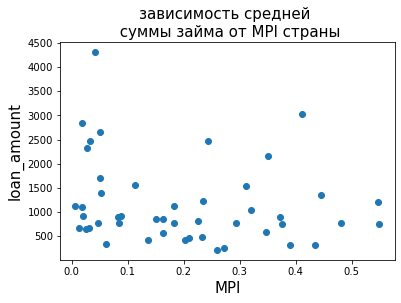

In [12]:

plt.scatter( mpi_contry_df.loc[country_list].sort_index()['MPI'], country_amount_MPI['loan_amount'])
plt.xlabel('MPI',fontsize=15)
plt.ylabel('loan_amount',fontsize=15)
plt.title('зависимость средней \n суммы займа от MPI страны',fontsize=15)
plt.show()

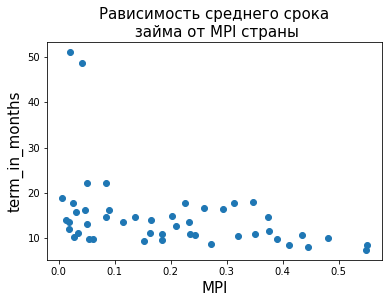

In [13]:
plt.scatter( mpi_contry_df.loc[country_list].sort_index()['MPI'],country_amount_MPI['term_in_months'])
plt.xlabel('MPI',fontsize=15)
plt.ylabel('term_in_months',fontsize=15)
plt.title('Pависимость среднего срока\n займа от MPI страны', fontsize=15)
plt.show()

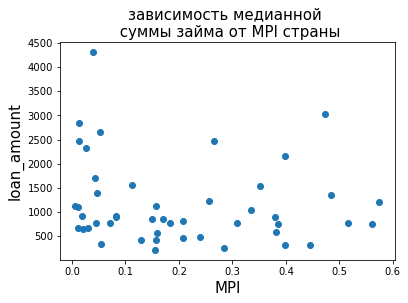

In [14]:
number=1000 # Минимальный порог  количества кредитов выданных в стране
mpi_contry_df=c[['country','MPI']].groupby('country').agg('median').dropna()
general_loane_frame=b[['country','sector']].groupby('country').agg('count').sort_values('sector',ascending=False)['sector']
zzz=set(general_loane_frame[general_loane_frame>100].index.tolist())
countr_list_loan=countr_list_loan-(countr_list_loan-zzz)
country_list=list(countr_list_loan-(countr_list_loan-set(mpi_contry_df.index.tolist())))
country_amount_MPI=b[['country','loan_amount','term_in_months']].groupby('country').agg('mean').loc[country_list].sort_index()
country_amount_MPI=b[['country','loan_amount','term_in_months']].groupby('country').agg('mean').loc[country_list].sort_index()
plt.scatter( mpi_contry_df.loc[country_list].sort_index()['MPI'], country_amount_MPI['loan_amount'])
plt.xlabel('MPI',fontsize=15)
plt.ylabel('loan_amount',fontsize=15)
plt.title('зависимость медианной \n суммы займа от MPI страны',fontsize=15)
plt.show()



In [15]:
b.loc[:,'monthly_pay']=b['loan_amount']/b['term_in_months']


#### 4 задание
Зависимости таких метрик как сумма займа, срок займа, время финансирования заявки, ежемесячный платеж в разрезе макрорегионов.
Можно написать тысячи слов, но лучше один раз показать.


In [42]:
b.loc[:,'time_finace']=(b['funded_time']-b['posted_time']).astype('timedelta64[D]')
bu=b[['loan_amount','term_in_months','monthly_pay','time_finace','world_region']].dropna().groupby('world_region').agg('mean')


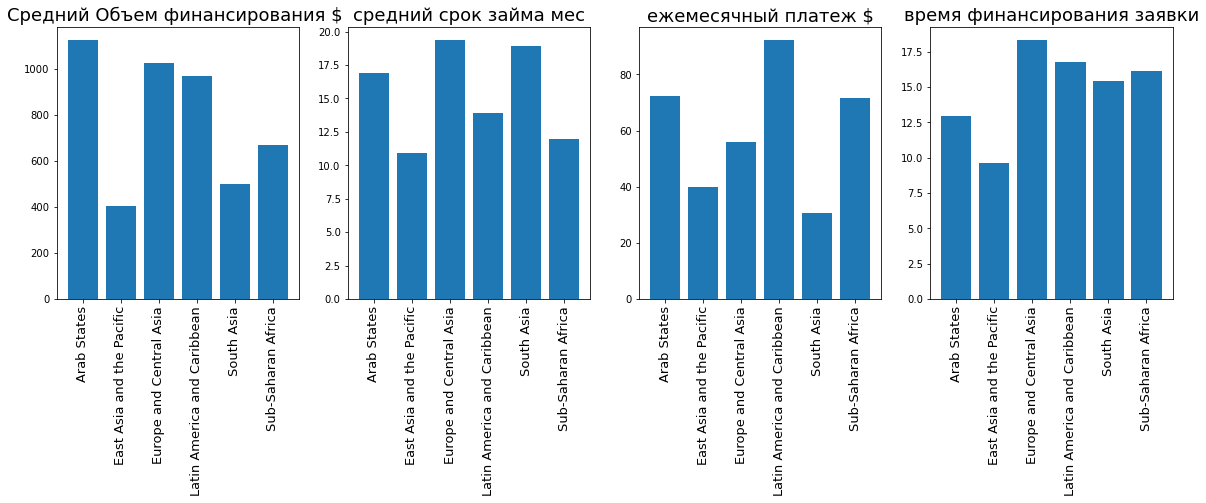

In [43]:
fig,ax=plt.subplots(1,4,figsize=(20,5))
nums=['loan_amount','term_in_months','monthly_pay','time_finace']
names_figs=['Объем финансирования $ ','средний срок займа мес','ежемесячный платеж $','время финансирования заявки']
for n in range(4):
     ax[n].bar(range(6),bu[nums[n]])
     ax[n].set_xticks(range(6))
     ax[n].set_xticklabels(bu.index,
                       rotation=90,
                        fontsize=13)
     ax[n].set_title(names_figs[n], fontsize=18)

plt.show()
